# Student Depression EDA and Prediction

The dataset contains data features including age, gender, academic performance, academic stress levels, sleep patterns and dietary habits, etc... This notebook aims to analyze the data relating to depression in students thorugh EDA and try various machine learning models to predict whether a student is depressed or not.

Dataset from Kaggle - https://www.kaggle.com/datasets/hopesb/student-depression-dataset/data

In [2]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create dataset
df = pd.read_csv('Student Depression Dataset.csv')

In [4]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

## Data cleaning

### Dealing with null values

In [6]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [7]:
df.loc[df['Financial Stress'].isnull()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
4458,22377,Female,32.0,Varanasi,Student,3.0,0.0,5.64,1.0,0.0,5-6 hours,Healthy,BCA,No,12.0,NaN,No,1
13596,68910,Male,29.0,Hyderabad,Student,2.0,0.0,8.94,3.0,0.0,Less than 5 hours,Unhealthy,B.Ed,No,12.0,NaN,Yes,0
19266,97610,Female,20.0,Kolkata,Student,1.0,0.0,6.83,1.0,0.0,5-6 hours,Healthy,MBBS,No,9.0,NaN,Yes,0


In [8]:
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5775
3.0    5226
1.0    5121
2.0    5061
Name: count, dtype: int64

In [9]:
# Drop the columns with unknown Financial Stress
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

### Removing unwanted records and columns
There are some columns with no pertenance to students, there might also be wrong answers given in the survey. Let's look at some columns and remove them

We don't need the ID column, it serves no purpose in our predicting models.

In [11]:
# Drop ID column
df.drop(['id'], axis=1, inplace=True)

In [12]:
df.Age.unique()

array([33., 24., 31., 28., 25., 29., 30., 27., 19., 20., 23., 18., 21.,
       22., 34., 32., 26., 39., 35., 42., 36., 58., 49., 38., 51., 44.,
       43., 46., 59., 54., 48., 56., 37., 41.])

In [13]:
df.Profession.value_counts()

Profession
Student                   27867
Architect                     8
Teacher                       6
Digital Marketer              3
Chef                          2
Content Writer                2
Pharmacist                    2
Doctor                        2
UX/UI Designer                1
Civil Engineer                1
Manager                       1
Educational Consultant        1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

We only want data relating to students, let's drop the other professions

In [14]:
df = df.loc[df.Profession == 'Student']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27867 entries, 0 to 27900
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27867 non-null  object 
 1   Age                                    27867 non-null  float64
 2   City                                   27867 non-null  object 
 3   Profession                             27867 non-null  object 
 4   Academic Pressure                      27867 non-null  float64
 5   Work Pressure                          27867 non-null  float64
 6   CGPA                                   27867 non-null  float64
 7   Study Satisfaction                     27867 non-null  float64
 8   Job Satisfaction                       27867 non-null  float64
 9   Sleep Duration                         27867 non-null  object 
 10  Dietary Habits                         27867 non-null  object 
 11  Degree 

In [16]:
# Drop Profession column, since all are students.
df.drop(['Profession'], axis=1,inplace=True)

In [17]:
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    7448
5.0    6286
4.0    5150
1.0    4799
2.0    4175
0.0       9
Name: count, dtype: int64

In [18]:
df['Work Pressure'].value_counts()

Work Pressure
0.0    27864
5.0        2
2.0        1
Name: count, dtype: int64

In [19]:
# Drop the records that have work pressure, then drop the Work Pressure column since only 2 students are working
df = df.loc[df['Work Pressure'] == 0.0]
df.drop(['Work Pressure'],axis=1, inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27864 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27864 non-null  object 
 1   Age                                    27864 non-null  float64
 2   City                                   27864 non-null  object 
 3   Academic Pressure                      27864 non-null  float64
 4   CGPA                                   27864 non-null  float64
 5   Study Satisfaction                     27864 non-null  float64
 6   Job Satisfaction                       27864 non-null  float64
 7   Sleep Duration                         27864 non-null  object 
 8   Dietary Habits                         27864 non-null  object 
 9   Degree                                 27864 non-null  object 
 10  Have you ever had suicidal thoughts ?  27864 non-null  object 
 11  Work/St

In [21]:
df.City.value_counts()

City
Kalyan                1564
Srinagar              1372
Hyderabad             1338
Vasai-Virar           1289
Lucknow               1154
Thane                 1139
Ludhiana              1109
Agra                  1092
Surat                 1078
Kolkata               1065
Jaipur                1034
Patna                 1006
Visakhapatnam          968
Pune                   968
Ahmedabad              949
Bhopal                 933
Chennai                883
Meerut                 822
Rajkot                 814
Delhi                  767
Bangalore              766
Ghaziabad              744
Mumbai                 698
Vadodara               693
Varanasi               684
Nagpur                 651
Indore                 643
Kanpur                 607
Nashik                 547
Faridabad              461
Saanvi                   2
Bhavna                   2
City                     2
Harsha                   2
Less Delhi               1
M.Tech                   1
3.0                    

In [22]:
# Remove records with wrong info to reduce noise. Also remove cities with just 1-2 students
df = df[df.City.isin(df.City.value_counts()[df.City.value_counts() > 461].index)]

In [23]:
df.City.value_counts()

City
Kalyan           1564
Srinagar         1372
Hyderabad        1338
Vasai-Virar      1289
Lucknow          1154
Thane            1139
Ludhiana         1109
Agra             1092
Surat            1078
Kolkata          1065
Jaipur           1034
Patna            1006
Visakhapatnam     968
Pune              968
Ahmedabad         949
Bhopal            933
Chennai           883
Meerut            822
Rajkot            814
Delhi             767
Bangalore         766
Ghaziabad         744
Mumbai            698
Vadodara          693
Varanasi          684
Nagpur            651
Indore            643
Kanpur            607
Nashik            547
Name: count, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27377 entries, 0 to 27900
Data columns (total 15 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27377 non-null  object 
 1   Age                                    27377 non-null  float64
 2   City                                   27377 non-null  object 
 3   Academic Pressure                      27377 non-null  float64
 4   CGPA                                   27377 non-null  float64
 5   Study Satisfaction                     27377 non-null  float64
 6   Job Satisfaction                       27377 non-null  float64
 7   Sleep Duration                         27377 non-null  object 
 8   Dietary Habits                         27377 non-null  object 
 9   Degree                                 27377 non-null  object 
 10  Have you ever had suicidal thoughts ?  27377 non-null  object 
 11  Work/St

In [25]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27372
2.0        3
3.0        1
1.0        1
Name: count, dtype: int64

In [26]:
# Remove records with Job satisfaction and drop column.
df = df.loc[df['Job Satisfaction'] == 0]

In [27]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27372
Name: count, dtype: int64

In [28]:
df.drop(['Job Satisfaction'], axis=1, inplace=True)

In [29]:
df = df.loc[df['Dietary Habits'] != 'Others']

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27360 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27360 non-null  object 
 1   Age                                    27360 non-null  float64
 2   City                                   27360 non-null  object 
 3   Academic Pressure                      27360 non-null  float64
 4   CGPA                                   27360 non-null  float64
 5   Study Satisfaction                     27360 non-null  float64
 6   Sleep Duration                         27360 non-null  object 
 7   Dietary Habits                         27360 non-null  object 
 8   Degree                                 27360 non-null  object 
 9   Have you ever had suicidal thoughts ?  27360 non-null  object 
 10  Work/Study Hours                       27360 non-null  float64
 11  Financi

In [31]:
columns = ['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress','Family History of Mental Illness', 'Depression']
for col in columns:
    print(df[col].value_counts(), '\n')

Gender
Male      15251
Female    12109
Name: count, dtype: int64 

Age
20.0    2209
24.0    2178
28.0    2098
29.0    1903
33.0    1875
25.0    1759
21.0    1702
23.0    1619
18.0    1563
19.0    1531
34.0    1428
27.0    1423
31.0    1382
32.0    1239
22.0    1148
26.0    1130
30.0    1125
35.0      10
38.0       7
36.0       7
42.0       4
39.0       3
48.0       3
46.0       2
43.0       2
37.0       2
44.0       1
51.0       1
49.0       1
58.0       1
54.0       1
59.0       1
56.0       1
41.0       1
Name: count, dtype: int64 

City
Kalyan           1564
Srinagar         1371
Hyderabad        1338
Vasai-Virar      1288
Lucknow          1153
Thane            1139
Ludhiana         1109
Agra             1091
Surat            1078
Kolkata          1064
Jaipur           1033
Patna            1006
Visakhapatnam     968
Pune              968
Ahmedabad         945
Bhopal            933
Chennai           883
Meerut            820
Rajkot            814
Delhi             767
Bangalore     

## Data Transformation

### Converting categorical data to numeric

In [32]:
df = df.loc[df['Sleep Duration'] != 'Others']

Let's give numeric values to the Sleep Duration column

In [33]:
# sns.pairplot(df, hue='Depression')
# plt.show()

In [34]:
# Assign numeric values to Sleep Duration
df.loc[df['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 4.5
df.loc[df['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 5.5
df.loc[df['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 7.5
df.loc[df['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 8.5
df['Sleep Duration'] = df['Sleep Duration'].astype(float)

In [35]:
df['Sleep Duration'].value_counts()

Sleep Duration
4.5    8165
7.5    7211
5.5    6048
8.5    5919
Name: count, dtype: int64

In [36]:
# Assign numeric values to Gender, Dietary Habits, Suicidal Thoughts and Family History
label_encoder = LabelEncoder()
columns = ['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

for col in columns:
    df[col] = label_encoder.fit_transform(df[col])

In [37]:
df.Gender.value_counts()

Gender
1    15242
0    12101
Name: count, dtype: int64

In [38]:
df['Dietary Habits'].value_counts()

Dietary Habits
2    10127
1     9728
0     7488
Name: count, dtype: int64

In [39]:
columns = ['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA', 'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress','Family History of Mental Illness', 'Depression']
for col in columns:
    print(df[col].value_counts(), '\n')

Gender
1    15242
0    12101
Name: count, dtype: int64 

Age
20.0    2208
24.0    2178
28.0    2096
29.0    1903
33.0    1874
25.0    1758
21.0    1702
23.0    1617
18.0    1562
19.0    1531
34.0    1427
27.0    1422
31.0    1380
32.0    1238
22.0    1147
26.0    1129
30.0    1123
35.0      10
38.0       7
36.0       7
42.0       4
39.0       3
48.0       3
46.0       2
43.0       2
37.0       2
44.0       1
51.0       1
49.0       1
58.0       1
54.0       1
59.0       1
56.0       1
41.0       1
Name: count, dtype: int64 

City
Kalyan           1563
Srinagar         1369
Hyderabad        1337
Vasai-Virar      1287
Lucknow          1153
Thane            1139
Ludhiana         1107
Agra             1090
Surat            1078
Kolkata          1064
Jaipur           1033
Patna            1006
Pune              968
Visakhapatnam     967
Ahmedabad         944
Bhopal            933
Chennai           883
Meerut            819
Rajkot            814
Delhi             765
Bangalore         764
Gh

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27343 entries, 0 to 27900
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27343 non-null  int64  
 1   Age                                    27343 non-null  float64
 2   City                                   27343 non-null  object 
 3   Academic Pressure                      27343 non-null  float64
 4   CGPA                                   27343 non-null  float64
 5   Study Satisfaction                     27343 non-null  float64
 6   Sleep Duration                         27343 non-null  float64
 7   Dietary Habits                         27343 non-null  int64  
 8   Degree                                 27343 non-null  object 
 9   Have you ever had suicidal thoughts ?  27343 non-null  int64  
 10  Work/Study Hours                       27343 non-null  float64
 11  Financi

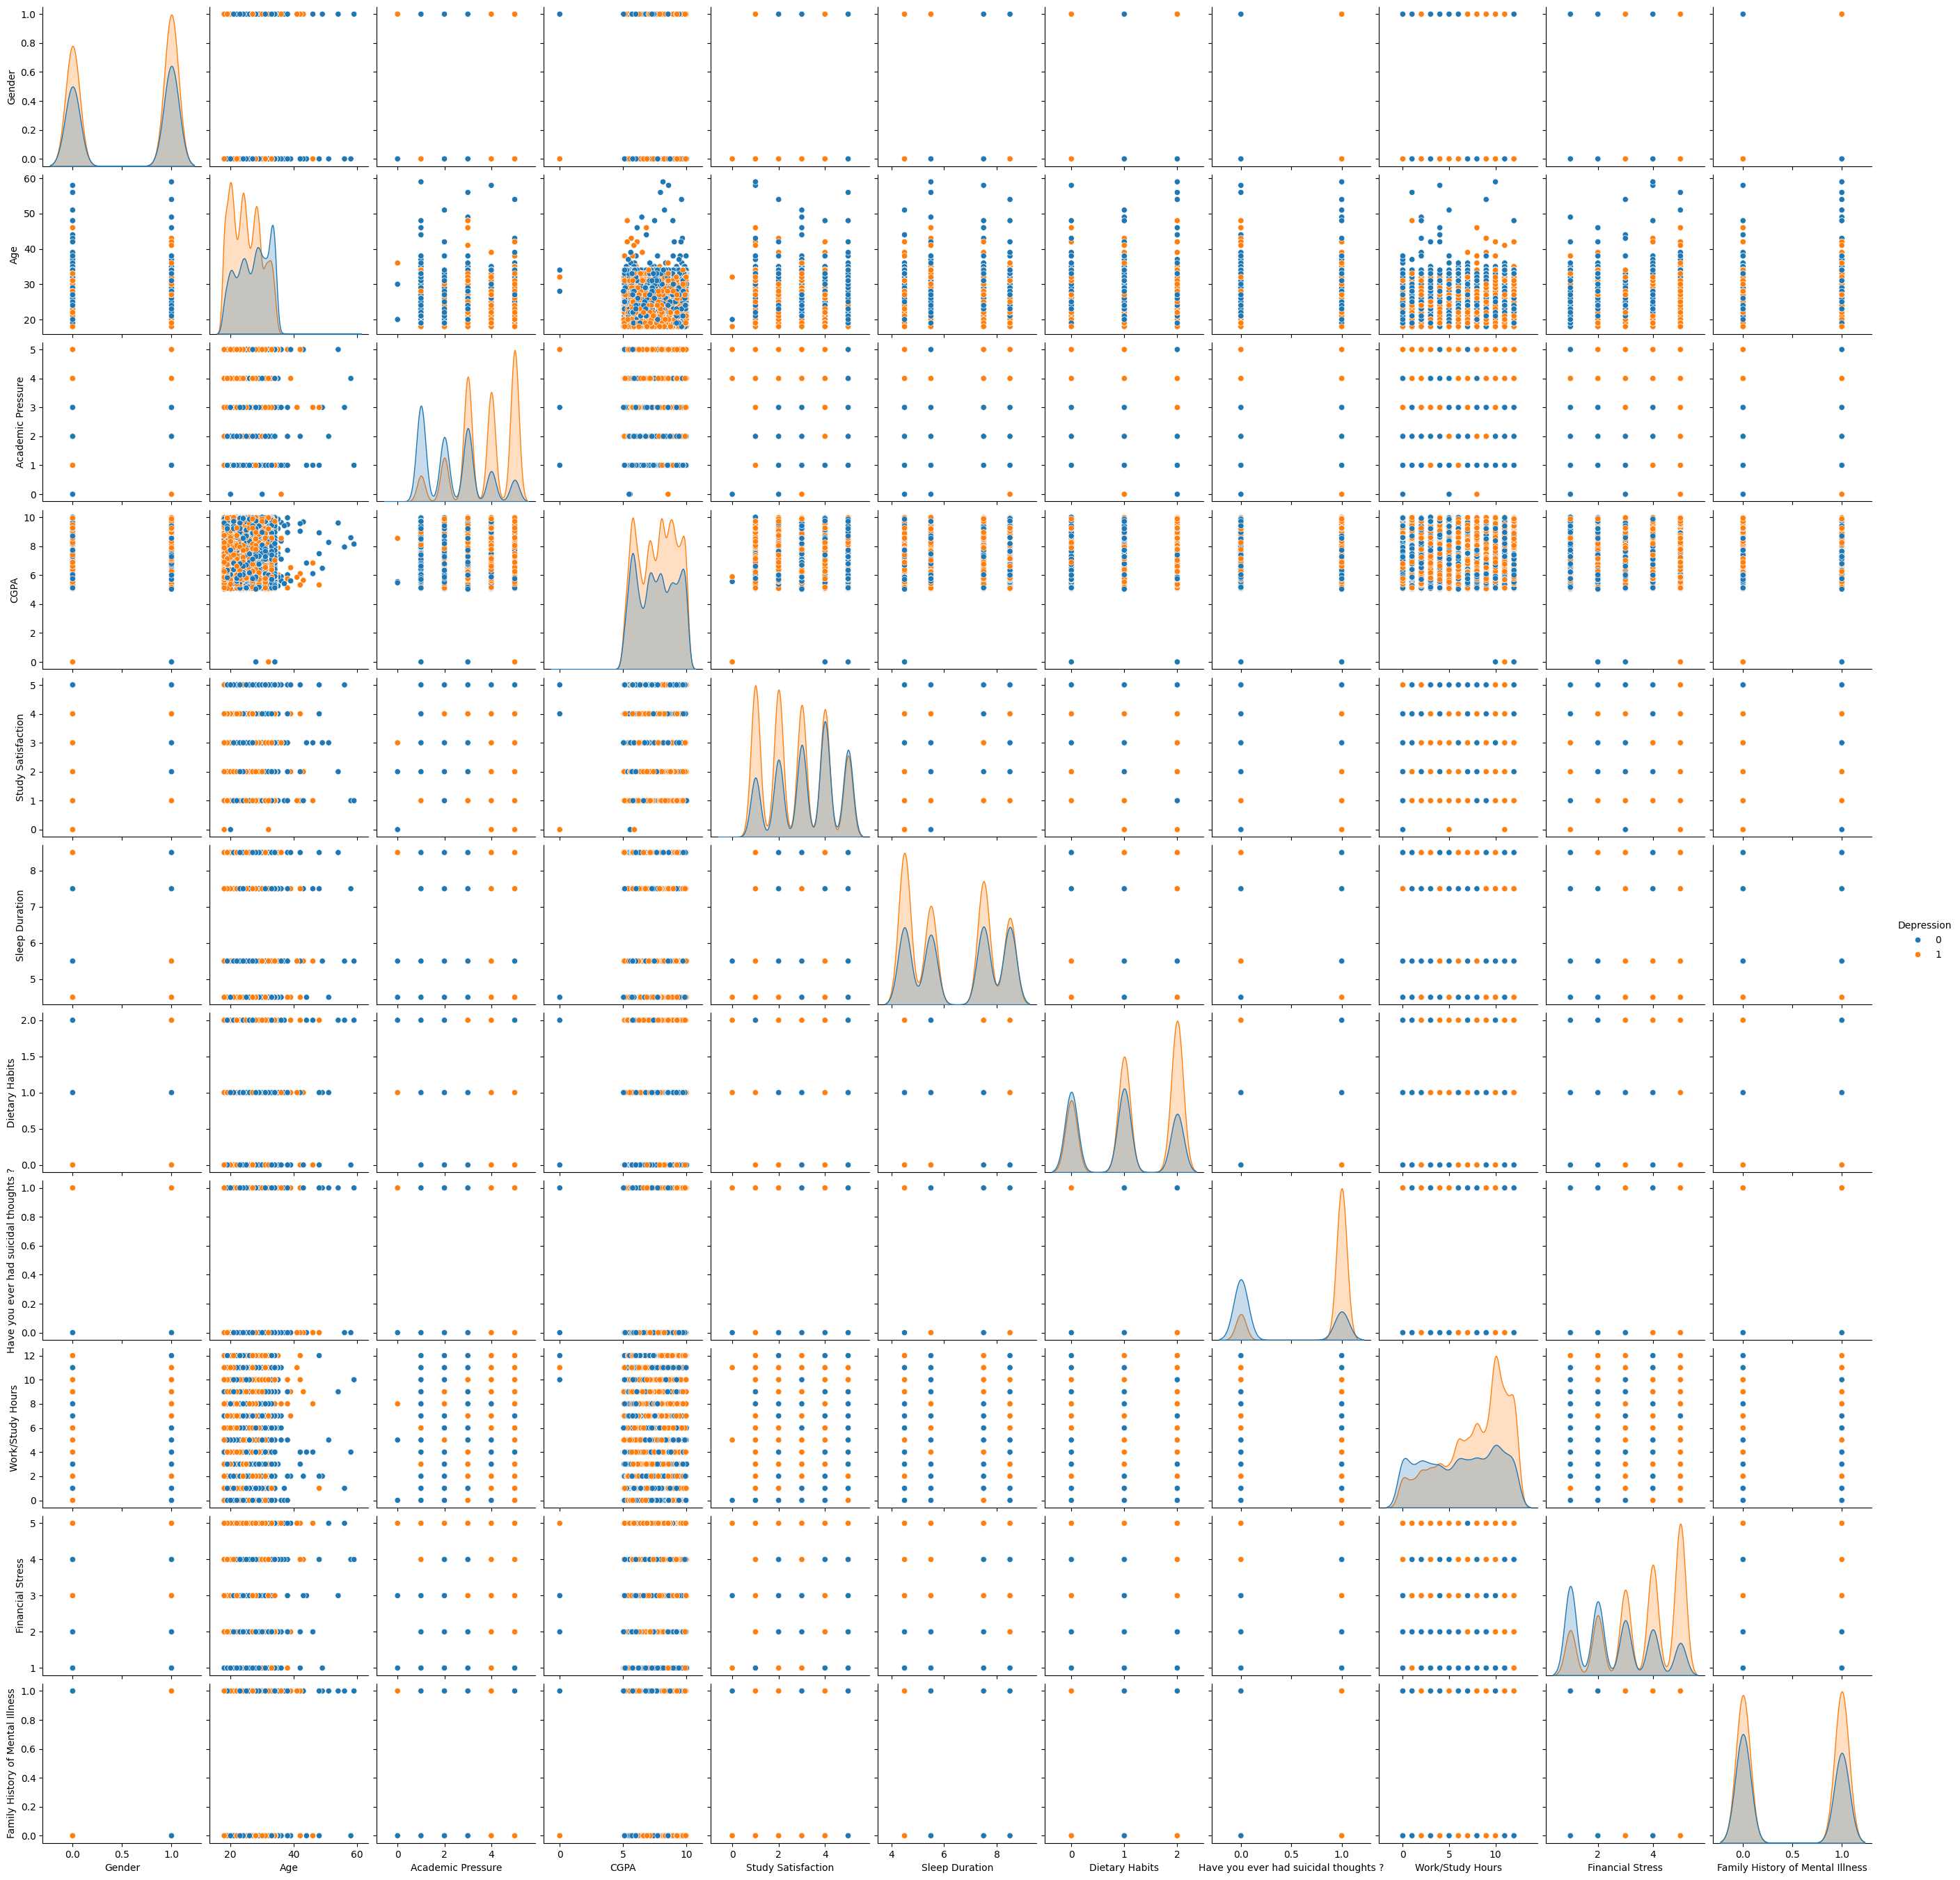

In [ ]:
sns.pairplot(df, hue='Depression')
plt.show()

In [42]:
# One Hot encoding city and degree columns.
city_encoder = OneHotEncoder(sparse_output=False)

encoded_city = city_encoder.fit_transform(df[['City']])
encoded_city_df = pd.DataFrame(encoded_city, columns=city_encoder.get_feature_names_out(['City']))

degree_encoder = OneHotEncoder(sparse_output=False)
encoded_degree = degree_encoder.fit_transform(df[['Degree']])
encoded_degree_df = pd.DataFrame(encoded_degree, columns=degree_encoder.get_feature_names_out(['Degree']))

df = pd.concat([df.reset_index(), encoded_city_df, encoded_degree_df], axis=1).drop(columns=['City', 'Degree'])

In [43]:
df.columns.values

array(['index', 'Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness',
       'Depression', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Ghaziabad',
       'City_Hyderabad', 'City_Indore', 'City_Jaipur', 'City_Kalyan',
       'City_Kanpur', 'City_Kolkata', 'City_Lucknow', 'City_Ludhiana',
       'City_Meerut', 'City_Mumbai', 'City_Nagpur', 'City_Nashik',
       'City_Patna', 'City_Pune', 'City_Rajkot', 'City_Srinagar',
       'City_Surat', 'City_Thane', 'City_Vadodara', 'City_Varanasi',
       'City_Vasai-Virar', 'City_Visakhapatnam', 'Degree_B.Arch',
       'Degree_B.Com', 'Degree_B.Ed', 'Degree_B.Pharm', 'Degree_B.Tech',
       'Degree_BA', 'Degree_BBA', 'Degree_BCA', 'Degree_BE', 'Degree_BHM',
       'Degree_BSc', 'Degree_Class 12', 'Degr

In [44]:
df.isnull().sum()

index                0
Gender               0
Age                  0
Academic Pressure    0
CGPA                 0
                    ..
Degree_ME            0
Degree_MHM           0
Degree_MSc           0
Degree_Others        0
Degree_PhD           0
Length: 70, dtype: int64

## Machine Learning

### Train Test Split

Looking at the pairplot, a decision tree based algorithm like RandomForest or XGBoost, or KNN algorithm seems to be the best.\
A Linear classification model like Logistic regression does not seem like a good fit due to the overlapping of data points. 

Let's try out 3 models - Random Forests, XGBoost and K-nearest Neighbours.

In [45]:
X = df.drop('Depression',axis=1)
y = df.Depression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Training Models and Accuracy

In [47]:
# Linear Classification
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_scaled, y_train)


y_hat = logistic_regression.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_hat)

score_train = logistic_regression.score(X_train_scaled, y_train)

print(accuracy, score_train)

0.844944231120863 0.8495016915058974


In [48]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_scaled, y_train)
y_hat = random_forest.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_hat)

print(accuracy)

0.842750045712196


In [49]:
# XGBoost
xgboost = xgb.XGBClassifier(random_state=42, max_depth=5)
xgboost.fit(X_train_scaled, y_train)
y_hat = xgboost.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_hat)
score_train = xgboost.score(X_train_scaled, y_train)

print(accuracy, score_train)

0.8381788261108064 0.8983724970284356


So XGBoost overfits the data (I think)

In [50]:
# KNN Classification
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
y_hat = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_hat)
score_train = knn_classifier.score(X_train_scaled, y_train)

print(accuracy, score_train)

  File "C:\Users\nmirf\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


0.7502285609800695 0.8456157995794094
